In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_set=pd.read_csv("Mall_Customers.csv")
df=pd.DataFrame(data_set)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [4]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df=df.join(pd.get_dummies(df["Gender"],dtype=int))
df.drop(["Gender"],axis=1,inplace=True)

In [6]:
from sklearn.cluster import KMeans

In [13]:
wccs=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(df)
    wccs.append(km.inertia_)

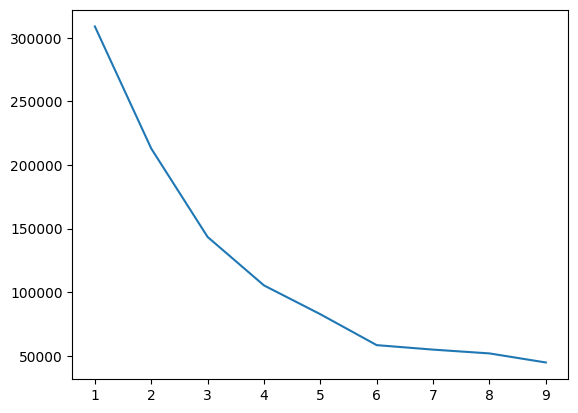

In [14]:
plt.plot(range(1,10),wccs)

In [15]:
x=df.iloc[:,:].values
km=KMeans(n_clusters=6)
y_mean=km.fit_predict(x)


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca

array([[-3.18693812e+01, -3.30010788e+01],
       [ 7.65592182e-01, -5.68419352e+01],
       [-5.74078253e+01, -1.31269869e+01],
       [-2.16718732e+00, -5.34792756e+01],
       [-3.21732489e+01, -3.03898198e+01],
       [-2.17562470e+00, -5.22279568e+01],
       [-5.90653221e+01, -9.54582108e+00],
       [ 1.23723997e+01, -6.16183575e+01],
       [-6.63158813e+01, -3.21486464e+00],
       [-5.65434779e+00, -4.72679921e+01],
       [-5.82365778e+01, -9.13462248e+00],
       [ 1.46233508e+01, -6.21078429e+01],
       [-5.51604619e+01, -1.00818741e+01],
       [-1.74979981e-03, -5.01147144e+01],
       [-5.27645840e+01, -1.16810741e+01],
       [ 1.94758969e+00, -5.15212221e+01],
       [-3.45048637e+01, -2.37630083e+01],
       [-7.30413420e+00, -4.35143547e+01],
       [-4.12571205e+01, -1.64735156e+01],
       [ 1.61917465e+01, -5.83003638e+01],
       [-3.27397160e+01, -2.13346470e+01],
       [-9.81067010e-01, -4.44514926e+01],
       [-5.78098973e+01, -1.87260565e+00],
       [-1.

In [17]:
y_mean

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 3,
       0, 4, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 5, 3, 5, 2, 5, 2, 5, 2, 5,
       3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5])

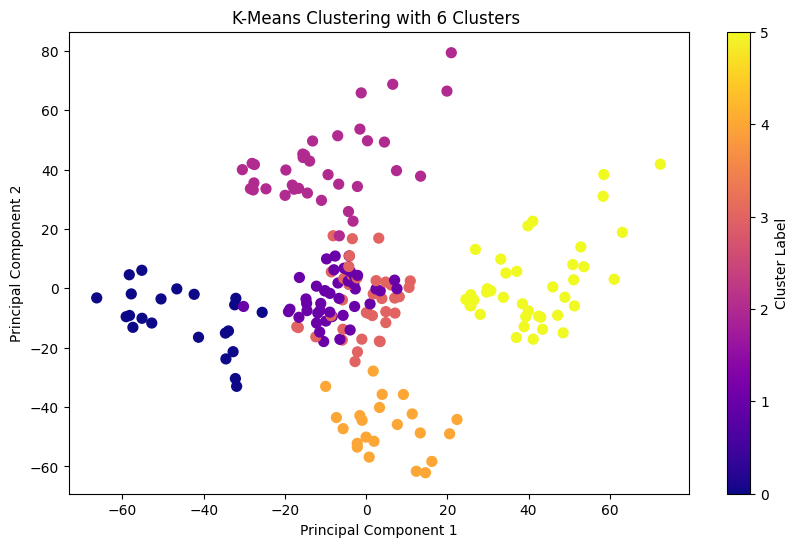

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_mean, cmap='plasma', s=50)
plt.title('K-Means Clustering with 6 Clusters ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()